#### Time Series Practice using non relevant data
Just some practice until the preliminary database is set up.
The data is North American emissions since 1949 to 2018

In [122]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

naem_df = pd.read_csv('NA_Emissions.csv')
naem_df.tail()

,Unnamed: 0,"CO2 emissions, North America, Annual (million metric tonnes carbon dioxide)"
65,2014,6468.127089
66,2015,6336.860299
67,2016,6241.322193
68,2017,6215.118995
69,2018,6381.236073


In [123]:
naem_df=naem_df.rename(columns={"Unnamed: 0":"Year", "CO2 emissions, North America, Annual (million metric tonnes carbon dioxide)":"Emissions"})
naem_df.head()

,Year,Emissions
0,1949,2206.690829
1,1950,2382.046176
2,1951,2526.687327
3,1952,2473.373964
4,1953,2536.892888


In [153]:
#split data into to train and test
#data spans 1948-2018
#lets say test data is 2000-2018
training_data = naem_df[naem_df['Year']<2000]
training_data

,Year,Emissions
0,1949,2206.690829
1,1950,2382.046176
2,1951,2526.687327
3,1952,2473.373964
4,1953,2536.892888
5,1954,2422.252560
6,1955,2684.786146
7,1956,2777.042758
8,1957,2756.562392
9,1958,2703.188545


In [154]:
test_data = naem_df[naem_df['Year']>1999]
test_data

,Year,Emissions
51,2000,6771.306959
52,2001,6684.063723
53,2002,6744.674606
54,2003,6839.776248
55,2004,6973.069314
56,2005,7008.754879
57,2006,6943.430516
58,2007,7042.220682
59,2008,6834.085119
60,2009,6391.314543


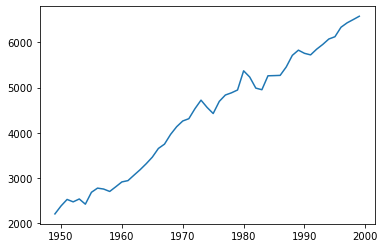

In [126]:
#plotting training data to see trends
y= training_data['Emissions']
X = training_data['Year']
plt.plot(X,y)

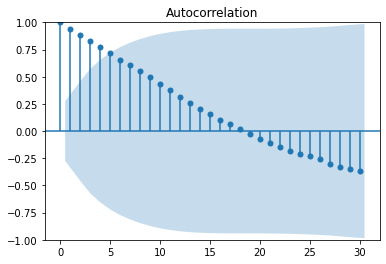

In [127]:
plot_acf(y, lags=30)
plt.show()
# this autocorrelation plot is used to help determine the amount of differencing (the d term in ARIMA) needed in the ARIMA model
# a positive autocorrelation at lag-1 shows that some amount of differencing is needed.
# the autocorrelation doesn't get close to zero until after lag-20 which suggests that a high amount of differencing is needed

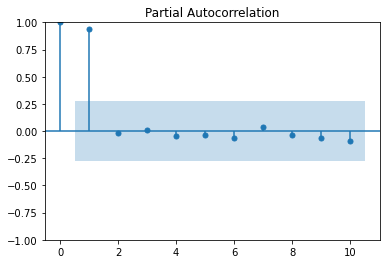

In [128]:
plot_pacf(y,lags=10, method='ywm')
plt.show()

# the partial autocorrelation graph is used to determine the value for the p order in the ARIMA model
# there is a sharp cutoff in the partial autocorrelation graph at lag-1. 
# when this is the case and there is a positive autocorrelation at lag-1 (which is shown in the previous graph)
# the value for p can be set to the number of the lag at which the partial autocorrelation cuts off. 1 in this case

In [129]:
#ARIMA
#Auto-Regressive Integreation Moving-Average

# three terms that I need to use for the ARIMA model
# p is the number of autoregressive terms (if the data is not stationary, has a trend or seasonality, we need this term to make it stationary)
#d is the number of nonseasonal differences needed to make it stationary
#q is the number of lagged forecast errors in the prediction equation.

# this data is not stationary (meaning it has a trend) so we need a value for d, i'll start with 2 and adjust from there
# as stated in the above cell i will use a p value of 1 at first

# the q term will be set to 0. This term should have a value if the data shows signs of being overdifferenced which can be determined by 
#the auto correlation graph. An overdifferenced dataset would have a negative lag-1 which this data does not have


                               SARIMAX Results                                
Dep. Variable:              Emissions   No. Observations:                   51
Model:                 ARIMA(2, 3, 0)   Log Likelihood                -328.711
Date:                Fri, 08 Jul 2022   AIC                            663.423
Time:                        17:32:55   BIC                            669.036
Sample:                             0   HQIC                           665.544
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6516      0.115     -5.684      0.000      -0.876      -0.427
ar.L2         -0.4518      0.114     -3.956      0.000      -0.676      -0.228
sigma2      5.123e+04   8750.695      5.854      0.0

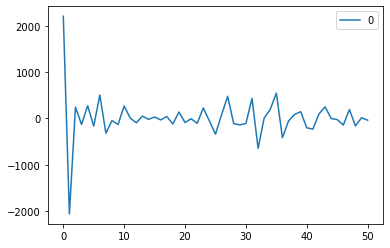

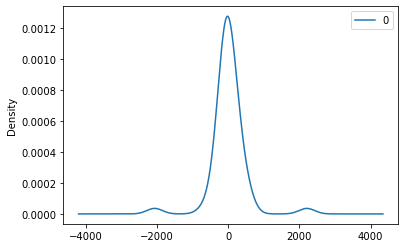

                 0
count    51.000000
mean      9.589823
std     483.005089
min   -2063.158627
25%    -126.013342
50%     -20.761910
75%     141.526893
max    2206.690829


In [150]:
#okay time to try the first attempt at modeling
model = ARIMA(y, order=(2,3,0))
model_fit = model.fit()
print(model_fit.summary())

#plot it
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

#error
residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

In [152]:
#trained the model now grabbing its predictions which should start at year 2000
# plotting predicted results
prediction_values = model_fit.predict(dynamic=False)
prediction_values=prediction_values[1:19]
prediction_values
# x = [2000,2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
# plt.plot(x, prediction_values, label = 'Predicted')
# plt.plot(test_data["Year"], test_data['Emissions'], label = 'Actual')
# plt.legend()
# plt.show()

1     4445.204803
2     2283.681390
3     2605.263594
4     2263.330923
5     2587.698083
6     2179.440666
7     3095.933176
8     2804.826584
9     2833.188373
10    2538.901854
11    2908.477397
12    3038.414957
13    3016.038344
14    3205.278809
15    3286.610000
16    3495.062372
17    3612.550955
18    3871.408571
Name: predicted_mean, dtype: float64

In [ ]:
#okay don't think i'm doing this right lul
#will come back to it later
#maybe get simpler data to practice with it?